# Model testing

In [1]:
#imports
import numpy as np
from python_speech_features import mfcc, delta, logfbank
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pathlib import Path
from os.path import join as pjoin
import IPython.display as ipd
from load_utils import rawtofeatures
import tensorflow as tf
from tensorflow.keras.models import Model, load_model

In [2]:
# Import best model
model = tf.keras.models.load_model(f'Models/CNNmodel_25ms_20ms_26_dropout20')

In [3]:
# Labels
keywords = np.array(['not a keyword', 'no', 'yes', 'marvin'])

In [4]:
def to_mask(prediction):
    x_ = prediction.reshape(4)
    return [x > 0.5 for x in x_]

In [5]:
# Plot features
def plot_mfcc(features):
    plt.rcParams["figure.figsize"] = (10,2)
    mfcc_data = np.swapaxes(features.reshape(50,39)[:,:12], 0 ,1)
    plt.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
    plt.title('MFCC')
    plt.clim(-60,60)
    plt.colorbar()
    #Showing mfcc_data
    plt.show()

The audio files we are working with are at most one second long and recorded by different people. Here we feed some examples to our model and see if it is capable of identifying them correctly.

#### Audio form the dataset - a keyword

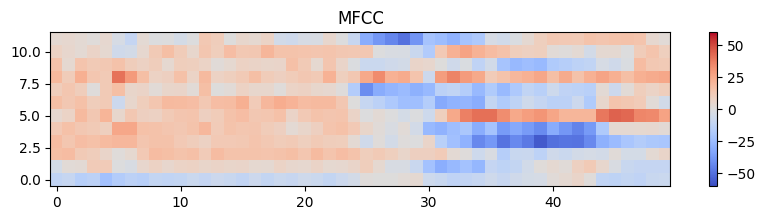

In [6]:
wav_file = 'TestData/105e72bb_nohash_1.wav'
features = rawtofeatures(wav_file).reshape((50,39,1))
plot_mfcc(features)
ipd.Audio(wav_file)

In [7]:
prediction = model.predict(np.transpose(features, [2,0,1]))
print('The word is', keywords[to_mask(prediction)][0])

1/1 [==============================] - 0s 399ms/step
The word is no


#### Audio form the dataset - not a keyword

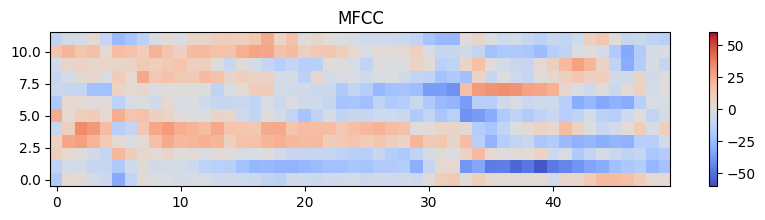

In [8]:
wav_file = 'TestData/19785c4e_nohash_1.wav'
features = rawtofeatures(wav_file).reshape((50,39,1))
plot_mfcc(features)
ipd.Audio(wav_file)

In [9]:
prediction = model.predict(np.transpose(features, [2,0,1]))
print('The word is', keywords[to_mask(prediction)][0])

1/1 [==============================] - 0s 55ms/step
The word is not a keyword


#### Carmen's audio - a keyword

When recording an audio with our phone, we need to convert the sample rate to 16kHz. We can use this link: https://www.aconvert.com/audio/

In [10]:
wav_file = 'TestData/marvin_carmen_sr16_1s.wav'
features = rawtofeatures(wav_file).reshape((50,39,1)) #reshape to add extra dimension
ipd.Audio(wav_file)

In [11]:
prediction = model.predict(np.transpose(features, [2,0,1]))
print('The word is', keywords[to_mask(prediction)][0])

1/1 [==============================] - 0s 56ms/step
The word is marvin


#### Carmen's audio - not a keyword

In [12]:
wav_file = 'TestData/on_carmen_sr16_1s.wav'
features = rawtofeatures(wav_file).reshape((50,39,1)) #reshape to add extra dimension
ipd.Audio(wav_file)

In [13]:
prediction = model.predict(np.transpose(features, [2,0,1]))
print('The word is', keywords[to_mask(prediction)][0])

1/1 [==============================] - 0s 58ms/step
The word is not a keyword


#### Alejandro's audio - not a keyword

In [14]:
wav_file = 'TestData/happy_ale_sr16_1s.wav'
features = rawtofeatures(wav_file).reshape((50,39,1))
ipd.Audio(wav_file)

In [15]:
prediction = model.predict(np.transpose(features, [2,0,1]))
print('The word is', keywords[to_mask(prediction)][0])

1/1 [==============================] - 0s 58ms/step
The word is not a keyword


#### Alejandro's audio - a keyword

In [16]:
wav_file = 'TestData/yes_ale_sr16_1s.wav'
features = rawtofeatures(wav_file).reshape((50,39,1))
ipd.Audio(wav_file)

In [17]:
prediction = model.predict(np.transpose(features, [2,0,1]))
print('The word is', keywords[to_mask(prediction)][0])

1/1 [==============================] - 0s 51ms/step
The word is yes
